
# Polynomial Regression Learning Material

Polynomial Regression extends linear regression to model relationships between the independent variable x and the dependent variable y as an nth degree polynomial. It provides a good approximation of the relationship when the relationship is non-linear.

## Introduction

Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y, denoted E(y |x), and has been used to describe nonlinear phenomena such as the growth rate of tissues, the distribution of carbon isotopes in lake sediments, and the progression of disease epidemics.

### Formula

The general formula for a polynomial regression is:

$$ y = b_0 + b_1x + b_2x^2 + ... + b_nx^n + \epsilon $$

where:
- $y$ is the predicted outcome,
- $x$ is the predictor,
- $b_0, b_1, ..., b_n$ are the regression coefficients,
- $\epsilon$ is the error term.



## Selecting the Order of the Polynomial

The order of the polynomial is a critical decision in polynomial regression as it determines the complexity of the model. A higher degree can fit the training data better but might lead to overfitting.

### Overfitting and Underfitting

- **Overfitting** occurs when the model is too complex, capturing the noise along with the underlying pattern.
- **Underfitting** happens when the model is too simple to capture the underlying trend of the data.

### Techniques for Order Selection

1. **Cross-validation:** Divides the data into subsets, uses some subsets to train the model and the rest to test it, iterating this process to evaluate the performance of models with different orders.
2. **Information Criteria:** Such as Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC), which penalize models for the number of parameters.

### Theorem: Bias-Variance Tradeoff

The bias-variance tradeoff is an important theorem in machine learning that states that with increasing model complexity, variance increases and bias decreases. The optimal model order minimizes the total error, which is the sum of bias, variance, and irreducible error.



## Example: Polynomial Regression with NumPy and Visualization

We will use NumPy to perform polynomial regression on a sample dataset and visualize the results with matplotlib.


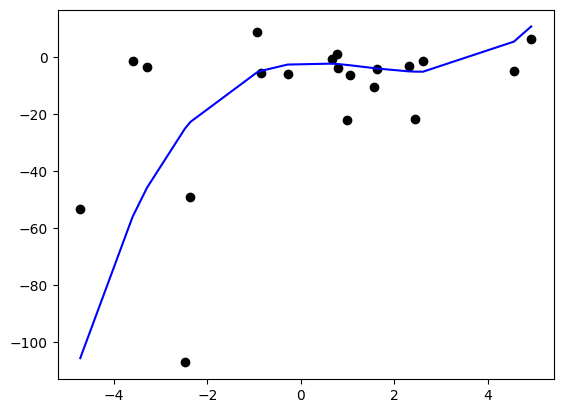

In [8]:

import numpy as np
import matplotlib.pyplot as plt

# Sample data
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# Transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

# Sorting values for plotting
sorted_zip = sorted(zip(x, y_poly_pred))
x, y_poly_pred = zip(*sorted_zip)

plt.scatter(x, y, color='black')
plt.plot(x, y_poly_pred, color='blue')
plt.show()



## Exact Fit with High-Order Polynomial Regression

In some cases, it is possible to fit the dataset exactly using a polynomial regression of high order. This scenario occurs when the polynomial order is equal to or higher than the number of data points minus one. While this might seem desirable, it often leads to overfitting, especially with noisy data.

### Explanation

A polynomial of order \(n\) can perfectly fit \(n+1\) data points by passing through each point exactly. This is because the polynomial equation can adjust its coefficients to match each point's x and y values. However, such a model is likely to perform poorly on unseen data as it captures the noise in the training data as if it were a real pattern.

### Example: Exact Fit with Polynomial Regression


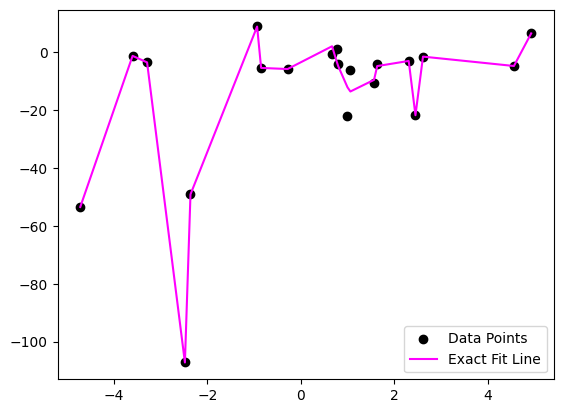

In [9]:

# Assuming the same sample data as before

# Using a polynomial of degree equal to the number of points - 1
degree = len(x) - 1
polynomial_features = PolynomialFeatures(degree=degree)
x_poly_exact = polynomial_features.fit_transform(x)

model_exact = LinearRegression()
model_exact.fit(x_poly_exact, y)
y_poly_pred_exact = model_exact.predict(x_poly_exact)

# Visualization
plt.scatter(x, y, color='black', label='Data Points')
plt.plot(x, y_poly_pred_exact, color='magenta', label='Exact Fit Line')
plt.legend()
plt.show()



## Polynomial Regression From Scratch in Pure Python

Implementing polynomial regression from scratch involves calculating the polynomial coefficients manually without relying on libraries like NumPy or scikit-learn. We'll use the least squares method for simplicity, which involves solving a system of linear equations to find the best-fit line.

### Theory: Least Squares Method

The least squares method minimizes the sum of the squares of the differences between the observed and predicted values. In the context of polynomial regression, this involves setting up and solving a system of equations derived from the polynomial equation and the data points.

### Example: Implementing Polynomial Regression from Scratch



# Method to Calculate Coefficients for Polynomial Regression

Polynomial regression is a form of regression analysis in which the relationship between the independent variable \( x \) and the dependent variable \( y \) is modeled as an \( n \)th degree polynomial. Polynomial regression fits a nonlinear relationship between the value of \( x \) and the corresponding conditional mean of \( y \), denoted \( E(y|x) \).

## Least Squares Method

The least squares method is a standard approach in regression analysis to approximate the solution of overdetermined systems (sets of equations in which there are more equations than unknowns) by minimizing the sum of the squares of the residuals made in the results of every single equation.

The objective of least squares regression is to fit a polynomial curve to the data that minimizes the sum of the squares of the differences (errors) between the observed values \( y \) and the values predicted by the polynomial curve \( f(x) \).

### Second-Degree Polynomial

For a second-degree polynomial, the curve has the equation:

$$ f(x) = a_0 + a_1x + a_2x^2 $$

We want to find the coefficients $ a_0 $, $ a_1 $, and $ a_2 $ that minimize the sum of squared differences between the observed $ y $ values and the values predicted by our polynomial function $ f(x) $.

### Calculating Coefficients

The process of calculating the coefficients involves several steps:

1. **Summation:**
   Calculate the necessary sums of the $ x $ and $ y $ values, such as $ \Sigma x $, $ \Sigma y $, $ \Sigma x^2 $, $ \Sigma x^3 $, $ \Sigma x^4 $, $ \Sigma xy $, and $ \Sigma x^2y $.

2. **Matrix Setup:**
   Set up the matrix equation $ Ax = B $, where $ A $ is a matrix of the sums of powers of $ x $, and $ B $ is a vector containing sums that include $ y $ values.

3. **Determinants:**
   Compute the determinant of $ A $ and the determinants of the matrices formed by replacing one column of $ A $ with $ B $ using Cramer's Rule. These determinants will be used to solve for the coefficients.

4. **Solve for Coefficients:**
   Calculate the coefficients $ a_0 $, $ a_1 $, and $ a_2 $ using the determinants found in the previous step, where each coefficient is equal to the determinant of its corresponding matrix divided by the determinant of $ A $.

### Conclusion

By applying these steps, we can fit a second-degree polynomial to a given set of data points using the least squares method, which provides a model that best explains the variability of the data.

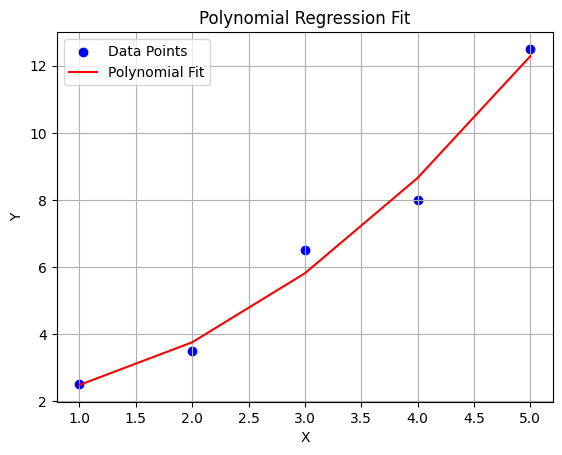

In [11]:
# Let's redefine the function to calculate the coefficients correctly for a second-degree polynomial
# and create a plot that correctly visualizes the fit to the provided sample data points.

def calculate_coefficients(x, y):
    """Calculate the coefficients for a second-degree polynomial using least squares."""
    # Calculate the sums needed for the least squares calculations
    n = len(x)
    x_sum = sum(x)
    y_sum = sum(y)
    x2_sum = sum(xi**2 for xi in x)
    x3_sum = sum(xi**3 for xi in x)
    x4_sum = sum(xi**4 for xi in x)
    xy_sum = sum(xi*yi for xi, yi in zip(x, y))
    x2y_sum = sum(xi**2 * yi for xi, yi in zip(x, y))

    # Set up the matrix equation Ax = B
    A = [
        [n, x_sum, x2_sum],
        [x_sum, x2_sum, x3_sum],
        [x2_sum, x3_sum, x4_sum]
    ]
    B = [y_sum, xy_sum, x2y_sum]

    # Solve the matrix equation using Cramer's Rule
    det_A = (A[0][0]*A[1][1]*A[2][2] + A[0][1]*A[1][2]*A[2][0] + A[0][2]*A[1][0]*A[2][1]
             - A[0][2]*A[1][1]*A[2][0] - A[0][1]*A[1][0]*A[2][2] - A[0][0]*A[1][2]*A[2][1])

    # Cofactor expansion along the first row
    det_A0 = (B[0]*A[1][1]*A[2][2] + A[0][1]*A[1][2]*B[2] + A[0][2]*B[1]*A[2][1]
              - A[0][2]*A[1][1]*B[2] - A[0][1]*B[1]*A[2][2] - B[0]*A[1][2]*A[2][1])
    det_A1 = (A[0][0]*B[1]*A[2][2] + B[0]*A[1][2]*A[2][0] + A[0][2]*A[1][0]*B[2]
              - A[0][2]*B[1]*A[2][0] - B[0]*A[1][0]*A[2][2] - A[0][0]*A[1][2]*B[2])
    det_A2 = (A[0][0]*A[1][1]*B[2] + A[0][1]*B[1]*A[2][0] + B[0]*A[1][0]*A[2][1]
              - B[0]*A[1][1]*A[2][0] - A[0][1]*A[1][0]*B[2] - A[0][0]*B[1]*A[2][1])

    # The coefficients for the polynomial
    a0 = det_A0 / det_A
    a1 = det_A1 / det_A
    a2 = det_A2 / det_A

    return a0, a1, a2

# Given sample data
x = [1, 2, 3, 4, 5]
y = [2.5, 3.5, 6.5, 8, 12.5]

# Calculate the polynomial coefficients
a0, a1, a2 = calculate_coefficients(x, y)

# Define a function to compute y values for given x values based on the polynomial coefficients
def poly_fit(x, a0, a1, a2):
    return [a0 + a1*xi + a2*xi**2 for xi in x]

# Calculate fitted y values
fitted_y = poly_fit(x, a0, a1, a2)

# Visualization code using matplotlib
import matplotlib.pyplot as plt

plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, fitted_y, color='red', label='Polynomial Fit')
plt.legend()
plt.title('Polynomial Regression Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()
